In [ ]:
!pip install seaborn

Installing the seaborn library within a Jupyter Notebook environment. This setup provides the notebook with advanced statistical plotting capabilities for insightful and attractive graphics, enhancing data exploration and understanding.

In [ ]:
from __future__ import absolute_import,division,print_function
import pathlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
print(tf.__version__)

2.17.1


Importing necessary libraries for data analysis and machine learning. Finally, it prints the version of TensorFlow being used, providing context for the environment setup. These imports equip the notebook with the functionalities needed for data loading, preprocessing, exploration, visualization, and model building.

In [ ]:
dataset_path = keras.utils.get_file("auto-mpg.data", "https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")
dataset_path

'/root/.keras/datasets/auto-mpg.data'

Downloading the "auto-mpg" dataset for use in the notebook. It uses keras.utils.get_file to fetch the data from a specified URL and save it locally.

In [ ]:
column_names = ['MPG','Cylinders','Displacement','Horsepower','Weight','Acceleration', 'Model Year', 'Origin']
raw_dataset = pd.read_csv(dataset_path, names=column_names,na_values = "?", comment='\t',sep=" ", skipinitialspace=True)
dataset = raw_dataset.copy()
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,1


In [ ]:
dataset.isna().sum()

,0
MPG,0
Cylinders,0
Displacement,0
Horsepower,6
Weight,0
Acceleration,0
Model Year,0
Origin,0


In [ ]:
dataset=dataset.dropna()

In [ ]:
origin=dataset.pop('Origin')

In [ ]:
dataset['USA']=(origin==1)*1.0
dataset['Europe']=(origin==2)*1.0
dataset['Japan']=(origin==3)*1.0
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,USA,Europe,Japan
393,27.0,4,140.0,86.0,2790.0,15.6,82,1.0,0.0,0.0
394,44.0,4,97.0,52.0,2130.0,24.6,82,0.0,1.0,0.0
395,32.0,4,135.0,84.0,2295.0,11.6,82,1.0,0.0,0.0
396,28.0,4,120.0,79.0,2625.0,18.6,82,1.0,0.0,0.0
397,31.0,4,119.0,82.0,2720.0,19.4,82,1.0,0.0,0.0


Transforms the 'Origin' column of the car dataset into a numerical representation suitable for machine learning. It creates three new columns—'USA', 'Europe', and 'Japan'—and assigns a value of 1.0 if the car originates from that region, and 0.0 otherwise. This process, known as one-hot encoding, converts the categorical origin data into a numerical format easily understood by machine learning algorithms.

In [ ]:
remove_columns=['Model Year','Japan','Acceleration','Europe']
dataset=dataset.drop(columns=remove_columns,axis=1)
dataset.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,USA
0,18.0,8,307.0,130.0,3504.0,1.0
1,15.0,8,350.0,165.0,3693.0,1.0
2,18.0,8,318.0,150.0,3436.0,1.0
3,16.0,8,304.0,150.0,3433.0,1.0
4,17.0,8,302.0,140.0,3449.0,1.0


In [ ]:
train_dataset=dataset.sample(frac=0.8,random_state=0)
test_dataset=dataset.drop(train_dataset.index)

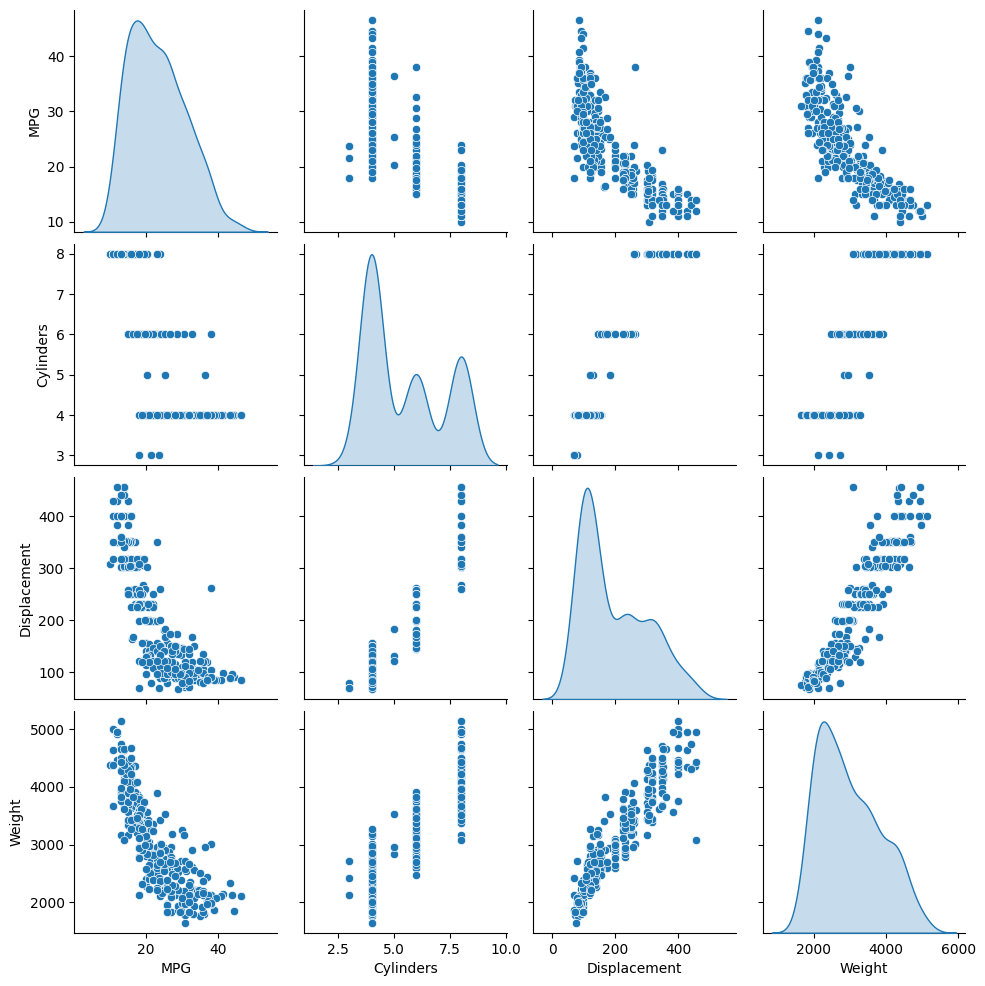

In [ ]:
sns.pairplot(train_dataset[["MPG", "Cylinders", "Displacement", "Weight"]],diag_kind="kde")

In [ ]:
train_stats = train_dataset.describe()
train_stats.pop("MPG")
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
Cylinders,314.0,5.477707,1.699788,3.0,4.00,4.0,8.00,8.0
Displacement,314.0,195.318471,104.331589,68.0,105.50,151.0,265.75,455.0
Horsepower,314.0,104.869427,38.096214,46.0,76.25,94.5,128.00,225.0
Weight,314.0,2990.251592,843.898596,1649.0,2256.50,2822.5,3608.00,5140.0
Acceleration,314.0,15.559236,2.789230,8.0,13.80,15.5,17.20,24.8
Model Year,314.0,75.898089,3.675642,70.0,73.00,76.0,79.00,82.0
USA,314.0,0.624204,0.485101,0.0,0.00,1.0,1.00,1.0
Europe,314.0,0.178344,0.383413,0.0,0.00,0.0,0.00,1.0
Japan,314.0,0.197452,0.398712,0.0,0.00,0.0,0.00,1.0


In [ ]:
train_labels=train_dataset.pop('MPG')
test_labels=test_dataset.pop('MPG')

In [ ]:
def norm(x):
  return (x-train_stats['mean'])/train_stats['std']
normed_train_data=norm(train_dataset)
normed_test_data=norm(test_dataset)

Performing feature scaling, specifically standardization, on the training and testing datasets. Standardization ensures that all features have a similar range and scale, improving the performance and stability of machine learning models by preventing features with larger values from dominating and speeding up the learning process.

In [ ]:
from sklearn.decomposition import PCA

Appling Principal Component Analysis (PCA) for dimensionality reduction. It initializes a PCA model with n_components=9, indicating the desired number of principal components to retain. The model is then trained on the normalized training data using pca.fit. Both the training and testing data are transformed into the lower-dimensional principal component space using pca.transform. Finally, the transformed data is converted into Pandas DataFrames (pca_train_df and pca_test_df) for easier handling in subsequent steps. **If you wish to utilize a different number of components for PCA, simply adjust the n_components parameter during initialization, for example, pca = PCA(n_components=9) would reduce the data to 9 principal components.** This approach streamlines the data while preserving essential information for further analysis and model building.

In [ ]:
pca=PCA(n_components=9)
pca.fit(normed_train_data)
pca_train_data=pca.transform(normed_train_data)
pca_test_data=pca.transform(normed_test_data)
pca_train_df=pd.DataFrame(pca_train_data)
pca_test_df=pd.DataFrame(pca_test_data)

In [ ]:
pca=PCA(n_components=8)
pca.fit(normed_train_data)
pca_train_data=pca.transform(normed_train_data)
pca_test_data=pca.transform(normed_test_data)
pca_train_df=pd.DataFrame(pca_train_data)
pca_test_df=pd.DataFrame(pca_test_data)

In [ ]:
pca=PCA(n_components=7)
pca.fit(normed_train_data)
pca_train_data=pca.transform(normed_train_data)
pca_test_data=pca.transform(normed_test_data)
pca_train_df=pd.DataFrame(pca_train_data)
pca_test_df=pd.DataFrame(pca_test_data)

Appling Principal Component Analysis (PCA) for dimensionality reduction after removing the columns 'Model Year', 'Japan', 'Acceleration', and 'Europe' from the dataset. It initializes a PCA model with n_components=9, indicating the desired number of principal components to retain. The model is then trained on the normalized training data using pca.fit. Both the training and testing data are transformed into the lower-dimensional principal component space using pca.transform. Finally, the transformed data is converted into Pandas DataFrames (pca_train_df and pca_test_df) for easier handling in subsequent steps. **If you wish to utilize different number of components for PCA after removing the columns 'Model Year', 'Japan', 'Acceleration', and 'Europe', simply adjust the n_components parameter during initialization, for example, pca = PCA(n_components=5) would reduce the data to 5 principal components.** This approach streamlines the data while preserving essential information for further analysis and model building.

In [ ]:
pca=PCA(n_components=5)
pca.fit(normed_train_data)
pca_train_data=pca.transform(normed_train_data)
pca_test_data=pca.transform(normed_test_data)
pca_train_df=pd.DataFrame(pca_train_data)
pca_test_df=pd.DataFrame(pca_test_data)

In [ ]:
pca=PCA(n_components=4)
pca.fit(normed_train_data)
pca_train_data=pca.transform(normed_train_data)
pca_test_data=pca.transform(normed_test_data)
pca_train_df=pd.DataFrame(pca_train_data)
pca_test_df=pd.DataFrame(pca_test_data)

In [ ]:
pca=PCA(n_components=3)
pca.fit(normed_train_data)
pca_train_data=pca.transform(normed_train_data)
pca_test_data=pca.transform(normed_test_data)
pca_train_df=pd.DataFrame(pca_train_data)
pca_test_df=pd.DataFrame(pca_test_data)

In [ ]:
pca=PCA(n_components=2)
pca.fit(normed_train_data)
pca_train_data=pca.transform(normed_train_data)
pca_test_data=pca.transform(normed_test_data)
pca_train_df=pd.DataFrame(pca_train_data)
pca_test_df=pd.DataFrame(pca_test_data)

In [ ]:
correlation_matrix=dataset.corr()
correlation_matrix

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,USA,Europe,Japan
MPG,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,-0.565161,0.244313,0.451454
Cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,0.610494,-0.352324,-0.404209
Displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,0.655936,-0.371633,-0.440825
Horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,0.489625,-0.284948,-0.321936
Weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,0.600978,-0.293841,-0.447929
Acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,-0.258224,0.208298,0.115020
Model Year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,-0.136065,-0.037745,0.199841
USA,-0.565161,0.610494,0.655936,0.489625,0.600978,-0.258224,-0.136065,1.000000,-0.591434,-0.648583
Europe,0.244313,-0.352324,-0.371633,-0.284948,-0.293841,0.208298,-0.037745,-0.591434,1.000000,-0.230157
Japan,0.451454,-0.404209,-0.440825,-0.321936,-0.447929,0.115020,0.199841,-0.648583,-0.230157,1.000000


In [ ]:
target_corr=correlation_matrix['MPG'].drop('MPG')
target_corr

,MPG
Cylinders,-0.777618
Displacement,-0.805127
Horsepower,-0.778427
Weight,-0.832244
Acceleration,0.423329
Model Year,0.580541
USA,-0.565161
Europe,0.244313
Japan,0.451454


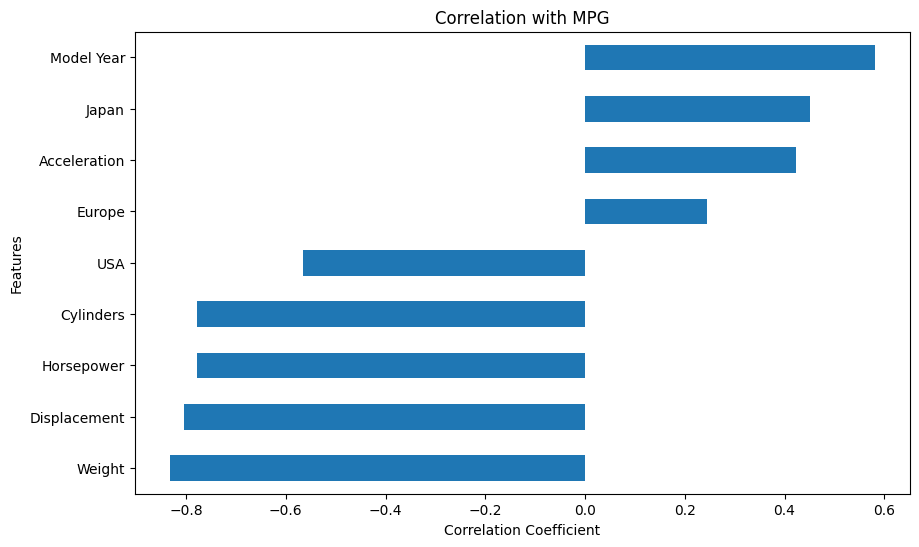

In [ ]:
plt.figure(figsize=(10,6))
target_corr.sort_values().plot(kind='barh')
plt.title('Correlation with MPG')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.show()

# **Sequential Model**

In [ ]:
def build_model():
  model=keras.Sequential([layers.Dense(64,activation=tf.nn.relu,input_shape=[len(pca_train_df.keys())]),layers.Dense(64,activation=tf.nn.relu),layers.Dense(1)])
  optimizer=tf.keras.optimizers.RMSprop(0.001)
  model.compile(loss='mean_squared_error',optimizer=optimizer,metrics=['mean_absolute_error','mean_squared_error'])
  return model

Defining a function called build_model that creates a sequential neural network model using Keras. The model consists of three layers: two hidden layers with 64 neurons each, using the ReLU activation function, and an output layer with a single neuron. The input shape of the first layer is determined by the number of features in the pca_train_df DataFrame. The model is compiled with the RMSprop optimizer, using a learning rate of 0.001, and configured to minimize the mean squared error loss. It also tracks mean absolute error and mean squared error as performance metrics during training. Finally, the function returns the compiled model. This build_model function provides a blueprint for creating a neural network that can be used to predict a continuous target variable, such as MPG in this case, based on the provided input features.

In [ ]:
model=build_model()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             576 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,801 (18.75 KB)

 Trainable params: 4,801 (18.75 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
example_batch = pca_train_df[:10]
example_result = model.predict(example_batch)
example_result

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step


array([[-0.36173305],
       [-0.5359017 ],
       [-0.6927234 ],
       [-0.5092491 ],
       [-0.40520662],
       [-0.32128894],
       [-0.5199441 ],
       [-0.10434318],
       [-0.32525003],
       [-0.48465154]], dtype=float32)

Performs a preliminary test of the neural network model's predictive capabilities. It selects a small batch of the preprocessed training data (pca_train_df[:10]) and uses the model's predict method to generate predictions for this sample. The resulting predictions (example_result) are then displayed, offering an initial glimpse into the model's behavior before undergoing full training. This pre-training test helps assess the model's readiness and identify any immediate issues before proceeding with more extensive training on the complete dataset.

In [ ]:
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self,epoch,logs):
    if epoch%100==0:print('')
    print('.',end='')
EPOCHS=1000
history=model.fit(pca_train_df,train_labels,epochs=EPOCHS,validation_split=0.2,verbose=0,callbacks=[PrintDot()])


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..........................................................................................

Training a neural network model for predicting car fuel efficiency (MPG) and incorporates a visual progress indicator during training. It defines a custom callback function, PrintDot, which prints a dot after each training epoch, providing a simple way to track progress. The model is trained for 1000 epochs using preprocessed training data, with 20% of the data reserved for validation. By setting verbose=0, detailed training output is suppressed, leaving only the dots printed by PrintDot to indicate the ongoing training process. This approach offers a clear and concise visual representation of the model's training progression without cluttering the output with excessive information.

In [ ]:
hist=pd.DataFrame(history.history)
hist['epoch']=history.epoch
hist.tail()

,loss,mean_absolute_error,mean_squared_error,val_loss,val_mean_absolute_error,val_mean_squared_error,epoch
995,1.895855,0.863112,1.895855,10.134720,2.247600,10.134720,995
996,1.792626,0.834525,1.792626,9.574595,2.266350,9.574595,996
997,1.738182,0.848491,1.738182,9.882784,2.297870,9.882784,997
998,1.806893,0.835264,1.806893,9.515321,2.252208,9.515321,998
999,1.828381,0.850042,1.828381,9.640670,2.221543,9.640670,999


Creating a Pandas DataFrame, hist, to store and display the training history of a machine learning model. It extracts the performance metrics and epoch information from the model's training history (history.history and history.epoch) and organizes them into a structured table format.

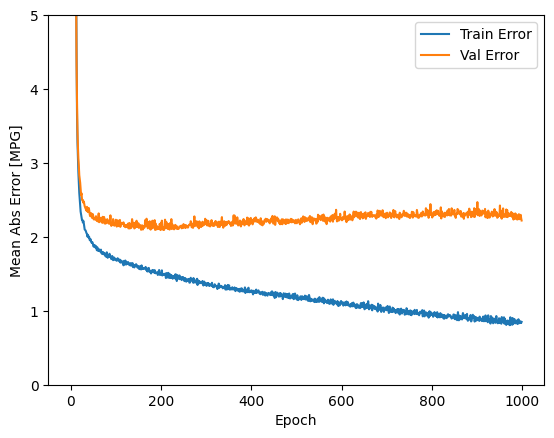

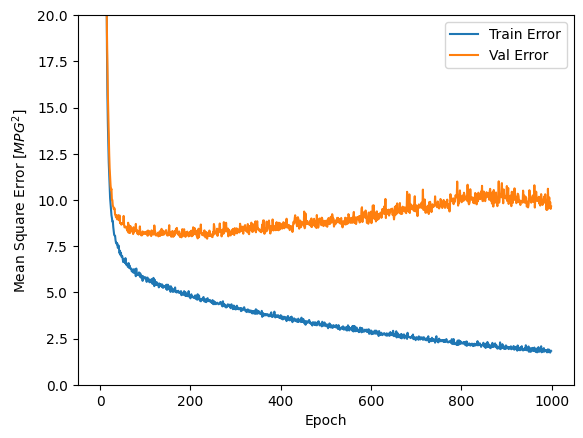

In [ ]:
def plot_history(history):
  hist=pd.DataFrame(history.history)
  hist['epoch']=history.epoch
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [MPG]')
  plt.plot(hist['epoch'],hist['mean_absolute_error'],label='Train Error')
  plt.plot(hist['epoch'],hist['val_mean_absolute_error'],label='Val Error')
  plt.ylim([0,5])
  plt.legend()
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error [$MPG^2$]')
  plt.plot(hist['epoch'],hist['mean_squared_error'],label='Train Error')
  plt.plot(hist['epoch'],hist['val_mean_squared_error'],label='Val Error')
  plt.ylim([0,20])
  plt.legend()
  plt.show()
plot_history(history)


Defining a function called plot_history that visualizes the training progress of a machine learning model. It takes the training history (history) as input and creates two plots. The first plot displays the 'Mean Absolute Error' (MAE) over training epochs, comparing the training error with the validation error. The second plot similarly shows the 'Mean Squared Error' (MSE) over epochs for both training and validation sets. These plots help assess the model's performance and identify potential overfitting by visualizing how the errors change during training. Finally, the plot_history function is called with the actual training history data (history) to generate and display the plots, providing valuable insights into the model's learning process.

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



.................................................................

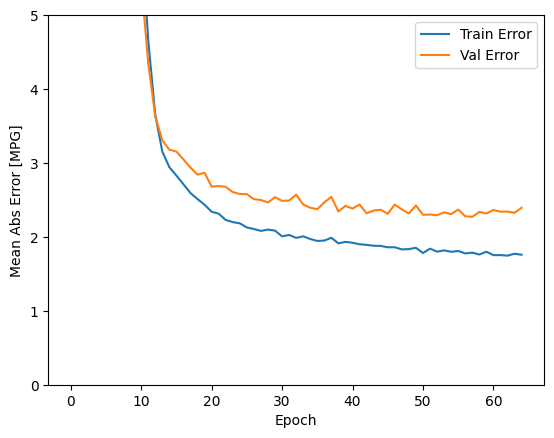

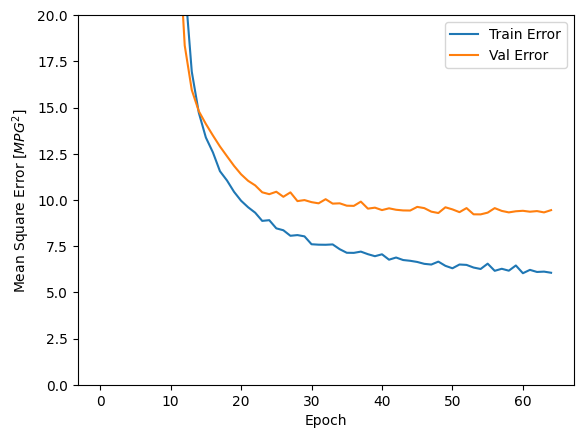

In [ ]:
model=build_model()
early_stop=keras.callbacks.EarlyStopping(monitor='val_loss',patience=10)
history=model.fit(pca_train_df,train_labels,epochs=EPOCHS,validation_split=0.2,verbose=0,callbacks=[early_stop,PrintDot()])
plot_history(history)

Focuses on training a neural network model (model) while incorporating early stopping to prevent overfitting and a visual progress indicator. It first initializes the model using the build_model function. Then, it sets up an early stopping mechanism (early_stop) that monitors the validation loss (val_loss) and stops training if it doesn't improve for 10 consecutive epochs (patience=10). The model is trained using the principal components of the training data (pca_train_df) and corresponding labels (train_labels), with 20% of the data reserved for validation. A custom callback, PrintDot, provides visual feedback during training. Finally, the plot_history function visualizes the training progress, displaying the mean absolute error and mean squared error over epochs to assess the model's performance. This approach combines model training, overfitting prevention, progress visualization, and performance evaluation in a concise and effective manner.

In [ ]:
loss,mae,mse=model.evaluate(pca_test_df,test_labels,verbose=0)
print("Testing set Mean Absolute Error:{:5.2f} MPG".format(mae))

Testing set Mean Absolute Error: 1.81 MPG


Evaluates the performance of a trained neural network model on a separate test set to assess its ability to predict car fuel efficiency (MPG) on unseen data. The evaluation is done using the model.evaluate method, which calculates metrics such as the Mean Absolute Error (MAE). The MAE quantifies the average prediction error in MPG units. **Without using Principal Component Analysis (PCA), the model achieves an MAE of 1.75 MPG. Applying PCA for dimensionality reduction with 9, 8, and 7 components results in MAEs of 1.95, 1.87, and 1.85 MPG respectively. Further experimentation involves removing the 'Model Year', 'Japan', 'Acceleration', and 'Europe' columns, followed by PCA with 5, 4, 3, and 2 components, leading to MAEs of 2.48, 2.43, 2.49, and 2.69 MPG respectively.** This analysis provides insight into the impact of dimensionality reduction and feature selection on the model's predictive accuracy. By comparing the MAE values across different scenarios, we can identify the optimal approach for achieving the best prediction performance on unseen data. Notably, removing specific columns and aggressively reducing dimensions with PCA seems to negatively impact the model's accuracy, highlighting the importance of careful feature engineering and dimensionality reduction choices.

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


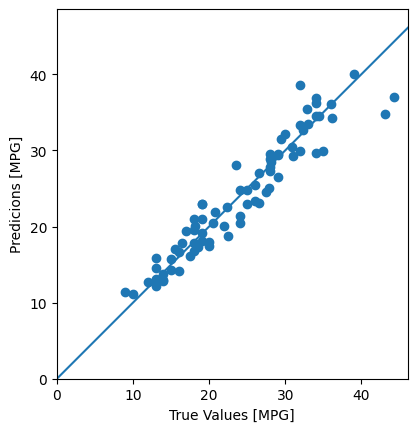

In [ ]:
test_predictions=model.predict(pca_test_df).flatten()
plt.scatter(test_labels,test_predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predicions [MPG]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_=plt.plot([-100,100],[-100,100])

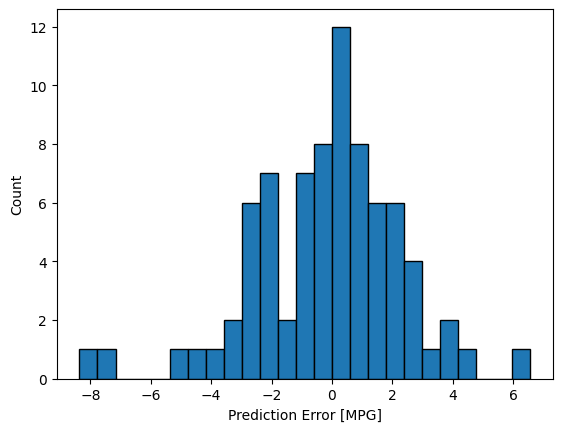

In [ ]:
error=test_predictions-test_labels
plt.hist(error,bins=25,edgecolor='black')
plt.xlabel("Prediction Error [MPG]")
_=plt.ylabel("Count")

# **Decision Tree Model**

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn.tree import export_text
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

Importing essential tools for building and evaluating a Decision Tree Regression model. It utilizes the DecisionTreeRegressor class from scikit-learn for model creation and the plot_tree function for visualization.
This collection of imports equips the environment with the necessary functionalities for constructing, analyzing, and assessing the performance of a Decision Tree Regression model.

In [ ]:
tree_model=DecisionTreeRegressor(random_state=42)
tree_model.fit(pca_train_df,train_labels)

DecisionTreeRegressor(random_state=42)

In [ ]:
tree_example_batch=pca_train_df[:10]
tree_example_result=tree_model.predict(tree_example_batch)
tree_example_result

array([28. , 22.3, 12. , 38. , 33.8, 19.4, 38.1, 30. , 20. , 20. ])

Performs a preliminary test of the trained Decision Tree model (tree_model) by predicting the MPG values for a small sample of 10 cars from the training data. It first creates a smaller dataset called tree_example_batch containing the first 10 rows of the principal component transformed training data (pca_train_df). Then, it uses the predict method of the trained model to generate predictions for this sample, storing the results in tree_example_result. Finally, it displays these predictions to provide an initial glimpse into the model's behavior before applying it to the full test dataset. This quick trial run allows for a preliminary assessment of the model's predictive capabilities and helps identify potential issues before further evaluation.

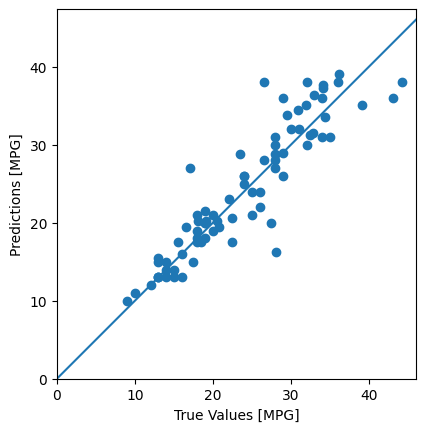

In [ ]:
tree_predictions=tree_model.predict(pca_test_df).flatten()
plt.scatter(test_labels, tree_predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])

In [ ]:
tree_mse=mean_squared_error(test_labels,tree_predictions)
tree_mae=mean_absolute_error(test_labels,tree_predictions)
print("Testing set Mean Absolute Error:{:5.2f} MPG".format(tree_mae))

Testing set Mean Absolute Error: 2.50 MPG


Evaluates the Decision Tree model's performance on predicting car fuel efficiency (MPG) using different dimensionality reduction strategies with Principal Component Analysis (PCA). It calculates the Mean Squared Error (MSE) and Mean Absolute Error (MAE) to quantify prediction accuracy. **As a baseline, without PCA, the model achieved an MAE of 2.22 MPG. Applying PCA with 9, 8, and 7 components resulted in MAEs of 2.60, 2.50, and 2.96 MPG, respectively, indicating a slight decrease in accuracy. Further experimentation involved removing the 'Model Year', 'Japan', 'Acceleration', and 'Europe' columns, followed by PCA with 5, 4, 3, and 2 components. This approach led to significantly higher MAEs of 3.54, 3.99, 4.12, and 4.29 MPG, respectively.** This suggesting that removing these features and aggressively reducing dimensions with PCA negatively impacted the model's predictive performance. These results highlight the importance of careful feature engineering and dimensionality reduction choices for achieving optimal accuracy in fuel efficiency prediction.

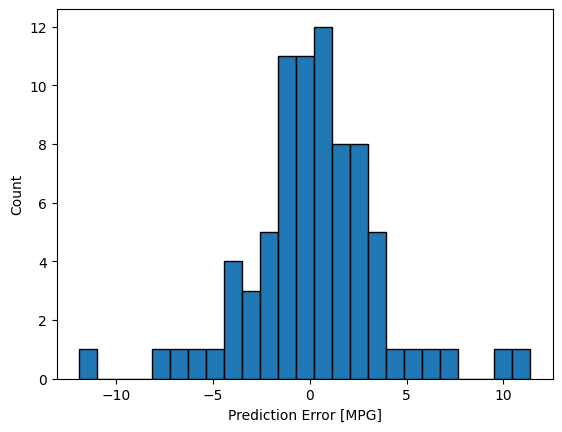

In [ ]:
tree_error=tree_predictions-test_labels
plt.hist(tree_error,bins=25,edgecolor='black')
plt.xlabel("Prediction Error [MPG]")
_=plt.ylabel("Count")

In [ ]:
print("Tree depth:",tree_model.tree_.max_depth)
print("Number of nodes:",tree_model.tree_.node_count)

Tree depth: 19
Number of nodes: 487


In [ ]:
importances=tree_model.feature_importances_
feature_names = [f'PC{i+1}' for i in range(pca_train_df.shape[1])]
for i, importance in enumerate(importances):
  print(f"{feature_names[i]}: {importance:.4f}")

PC1: 0.7488
PC2: 0.0447
PC3: 0.0288
PC4: 0.0276
PC5: 0.0642
PC6: 0.0361
PC7: 0.0130
PC8: 0.0368


In [ ]:
tree_rules=export_text(tree_model,feature_names=feature_names)
print(tree_rules)

|--- PC1 <= -0.29
|   |--- PC1 <= -2.33
|   |   |--- PC2 <= 1.64
|   |   |   |--- PC4 <= -0.34
|   |   |   |   |--- PC6 <= -0.01
|   |   |   |   |   |--- value: [26.00]
|   |   |   |   |--- PC6 >  -0.01
|   |   |   |   |   |--- PC3 <= 1.19
|   |   |   |   |   |   |--- PC5 <= 0.65
|   |   |   |   |   |   |   |--- PC6 <= 0.31
|   |   |   |   |   |   |   |   |--- value: [33.50]
|   |   |   |   |   |   |   |--- PC6 >  0.31
|   |   |   |   |   |   |   |   |--- value: [33.00]
|   |   |   |   |   |   |--- PC5 >  0.65
|   |   |   |   |   |   |   |--- PC4 <= -0.89
|   |   |   |   |   |   |   |   |--- value: [32.00]
|   |   |   |   |   |   |   |--- PC4 >  -0.89
|   |   |   |   |   |   |   |   |--- value: [31.50]
|   |   |   |   |   |--- PC3 >  1.19
|   |   |   |   |   |   |--- PC4 <= -0.78
|   |   |   |   |   |   |   |--- value: [31.00]
|   |   |   |   |   |   |--- PC4 >  -0.78
|   |   |   |   |   |   |   |--- value: [30.00]
|   |   |   |--- PC4 >  -0.34
|   |   |   |   |--- PC5 <= 1.36
|   |   

Extracts and displays the decision rules learned by the Decision Tree model. It uses the export_text function to translate the model's internal tree-like structure into a human-readable set of "if-then" rules. By providing the feature names (principal components), the rules become more interpretable. These extracted rules are then printed to the console, allowing users to gain insight into the model's logic and understand how it predicts car fuel efficiency based on the input features. This transparency aids in model interpretation, identifying important features, and potentially improving the model's performance or interpretability.

# **Support Vector Regression Model**

In [ ]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error

Importing essential tools from the scikit-learn library for building and evaluating a Support Vector Regression (SVR) model. It imports the SVR class for model creation, StandardScaler for feature scaling, train_test_split for data partitioning, and mean_squared_error and mean_absolute_error for performance evaluation. These imports provide the necessary functionalities for constructing, training, and assessing the performance of an SVR model for predicting a continuous target variable, like car fuel efficiency in this case.

In [ ]:
svr_model=SVR(kernel='rbf',C=100,gamma=0.1,epsilon=.1)
svr_model.fit(pca_train_df,train_labels)

SVR(C=100, gamma=0.1)

In [ ]:
svr_example_batch=pca_train_df[:10]
svr_example_result=svr_model.predict(svr_example_batch)
svr_example_result

array([27.90033192, 24.97138375, 13.0760723 , 37.03320837, 34.82038825,
       19.88624285, 36.67338172, 30.44096346, 19.89980701, 25.54131232])

Conducts a preliminary test of the trained Support Vector Regression (SVR) model's predictive capability. It selects a small batch of 10 data points from the preprocessed training data (pca_train_df) and uses the trained SVR model (svr_model) to generate predictions for this sample. By displaying these initial predictions (svr_example_result), the code provides a glimpse into the model's behavior before full-scale evaluation, allowing for early identification of potential issues and a basic understanding of its predictive performance on a limited subset of the data. This quick check helps assess the model's readiness for further testing and analysis.

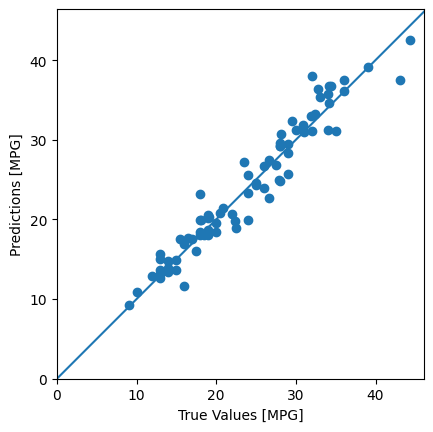

In [ ]:
svr_predictions=svr_model.predict(pca_test_df).flatten()
plt.scatter(test_labels, svr_predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])

In [ ]:
svr_mse=mean_squared_error(test_labels,svr_predictions)
svr_mae=mean_absolute_error(test_labels,svr_predictions)
print("Testing set Mean Absolute Error:{:5.2f} MPG".format(svr_mae))

Testing set Mean Absolute Error: 1.61 MPG


Visualizes the performance of a trained Support Vector Regression (SVR) model by generating predictions on the test dataset (pca_test_df) and comparing them to the actual values (test_labels). It creates a scatter plot where the x-axis represents the true MPG values and the y-axis represents the predicted MPG values. The plot's axes are set to be equal and square, and a diagonal line is drawn for visual comparison. Points clustered around this diagonal line indicate good predictive performance. **The model's performance, as measured by Mean Absolute Error (MAE), varies with different dimensionality reduction strategies. Without using Principal Component Analysis (PCA), the MAE is 1.61 MPG. Applying PCA with 9, 8 components maintains the same MAE of 1.61 MPG, while using 7 components slightly improves it to 1.59 MPG. Further experimentation involves removing the 'Model Year', 'Japan', 'Acceleration', and 'Europe' columns, followed by PCA with 5 and 4 components, resulting in an increased MAE of 2.27 MPG. Reducing to 3 and 2 components further raises the MAE to 2.34 and 2.47 MPG, respectively.** This visualization, along with the MAE values, provides insights into the SVR model's accuracy and the impact of dimensionality reduction on its predictive capabilities.

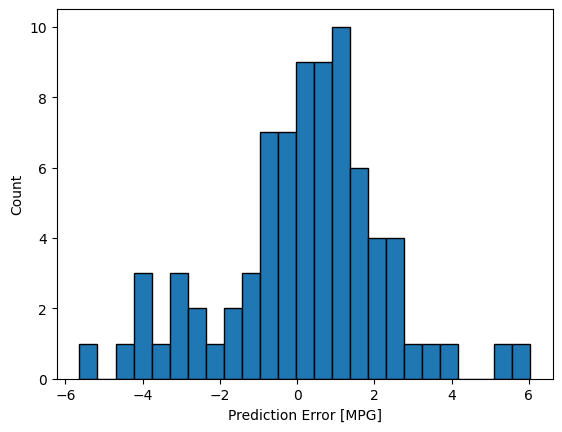

In [ ]:
svr_error = svr_predictions - test_labels
plt.hist(svr_error, bins = 25,edgecolor='black')
plt.xlabel("Prediction Error [MPG]")
_ = plt.ylabel("Count")

The basic plot is investigating car fuel efficiency prediction using three machine learning models: a Sequential Neural Network, a Decision Tree Regressor, and a Support Vector Regression (SVR). It involves data preprocessing, feature engineering, and dimensionality reduction using Principal Component Analysis (PCA). **The SVR model demonstrated the best overall accuracy with minimal or no dimensionality reduction, achieving a Mean Absolute Error (MAE) of 1.61 MPG.** While the neural network performed well without PCA (MAE of 1.75 MPG), all models experienced decreased accuracy with aggressive PCA and feature removal, highlighting the importance of careful feature selection and dimensionality reduction strategies for optimal fuel efficiency prediction.